In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/PZEM_Final_corrected_readings.csv")

In [ ]:
df.head()

,nodeid,voltage,current,power,energy,pf,frequency,relay,timestamp_ist
0,NODE_3,219.1,0.401,76.0,17.488,0.87,49.9,ON,'2025-12-10 15:50:26
1,NODE_3,218.2,0.400,75.3,17.488,0.86,49.9,ON,'2025-12-10 15:50:36
2,NODE_3,218.2,0.399,75.3,17.488,0.86,50.0,ON,'2025-12-10 15:50:47
3,NODE_3,218.6,0.400,75.6,17.488,0.86,50.0,ON,'2025-12-10 15:50:58
4,NODE_3,219.0,0.399,75.7,17.489,0.87,50.0,ON,'2025-12-10 15:51:08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nodeid         2075 non-null   object 
 1   voltage        2075 non-null   float64
 2   current        2075 non-null   float64
 3   power          2075 non-null   float64
 4   energy         2075 non-null   float64
 5   pf             2075 non-null   float64
 6   frequency      2075 non-null   float64
 7   relay          2075 non-null   object 
 8   timestamp_ist  2075 non-null   object 
dtypes: float64(6), object(3)
memory usage: 146.0+ KB


In [ ]:
df.nunique()

,0
nodeid,1
voltage,152
current,279
power,620
energy,923
pf,28
frequency,7
relay,2
timestamp_ist,2075


In [ ]:
df.describe()

,voltage,current,power,energy,pf,frequency
count,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000
mean,220.566892,1.631756,352.100434,17.964987,0.808646,50.025735
std,5.374695,1.804730,423.885870,0.583480,0.223693,3.160640
min,182.800000,0.000000,0.000000,17.488000,0.000000,49.400000
25%,216.300000,0.389000,51.900000,17.593000,0.550000,49.900000
50%,219.300000,0.421000,75.200000,17.679000,0.870000,50.000000
75%,227.100000,4.258000,966.850000,18.178500,1.000000,50.000000
max,228.900000,4.310000,984.300000,19.600000,1.000000,193.900000


In [ ]:
# df = df.drop('created',axis=1)

In [ ]:
df = df.drop(['relay'],axis=1)

In [ ]:
df = df.drop(['nodeid'],axis=1)

In [ ]:
df.head()

,voltage,current,power,energy,pf,frequency,timestamp_ist
0,219.1,0.401,76.0,17.488,0.87,49.9,'2025-12-10 15:50:26
1,218.2,0.400,75.3,17.488,0.86,49.9,'2025-12-10 15:50:36
2,218.2,0.399,75.3,17.488,0.86,50.0,'2025-12-10 15:50:47
3,218.6,0.400,75.6,17.488,0.86,50.0,'2025-12-10 15:50:58
4,219.0,0.399,75.7,17.489,0.87,50.0,'2025-12-10 15:51:08


In [ ]:
df.describe()
df[['current', 'power', 'energy']].head(20)
df[['pf', 'frequency']].value_counts().head()


pf    frequency
1.00  50.0         660
      49.9         316
0.87  50.0         241
      49.9          77
0.56  50.0          75
Name: count, dtype: int64

In [ ]:
df.corr(numeric_only=True)['voltage']


,voltage
voltage,1.000000
current,0.871625
power,0.874259
energy,0.766844
pf,0.597723
frequency,-0.145802


In [ ]:
df.isna().sum()


,0
voltage,0
current,0
power,0
energy,0
pf,0
frequency,0
timestamp_ist,0


In [ ]:
df['timestamp_ist'] = (
    df['timestamp_ist']
    .astype(str)
    .str.strip()
    .str.replace(r"^[\"']+|[\"']+$", "", regex=True)
)

df['timestamp_ist'] = pd.to_datetime(
    df['timestamp_ist'],
    errors='coerce',
    infer_datetime_format=True
)

=

df = df.sort_values('timestamp_ist').reset_index(drop=True)


/tmp/ipython-input-871662791.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['timestamp_ist'] = pd.to_datetime(


In [ ]:
df.shape

(2075, 7)

In [ ]:
df['hour'] = df['timestamp_ist'].dt.hour
df['day'] = df['timestamp_ist'].dt.day
df['minute'] = df['timestamp_ist'].dt.minute
df['day'] = df['timestamp_ist'].dt.day
df['dayofweek'] = df['timestamp_ist'].dt.dayofweek

In [ ]:
df.head()

,voltage,current,power,energy,pf,frequency,timestamp_ist,hour,day,minute,dayofweek
0,219.1,0.401,76.0,17.488,0.87,49.9,2025-12-10 15:50:26,15,10,50,2
1,218.2,0.400,75.3,17.488,0.86,49.9,2025-12-10 15:50:36,15,10,50,2
2,218.2,0.399,75.3,17.488,0.86,50.0,2025-12-10 15:50:47,15,10,50,2
3,218.6,0.400,75.6,17.488,0.86,50.0,2025-12-10 15:50:58,15,10,50,2
4,219.0,0.399,75.7,17.489,0.87,50.0,2025-12-10 15:51:08,15,10,51,2


In [ ]:
df = df.sort_values('timestamp_ist')


In [ ]:
# df = df.drop_duplicates(subset=['timestamp_ist'], keep='last')
df.duplicated(subset=['timestamp_ist']).sum()

np.int64(0)

In [ ]:
df.head()

,voltage,current,power,energy,pf,frequency,timestamp_ist,hour,day,minute,dayofweek
0,219.1,0.401,76.0,17.488,0.87,49.9,2025-12-10 15:50:26,15,10,50,2
1,218.2,0.400,75.3,17.488,0.86,49.9,2025-12-10 15:50:36,15,10,50,2
2,218.2,0.399,75.3,17.488,0.86,50.0,2025-12-10 15:50:47,15,10,50,2
3,218.6,0.400,75.6,17.488,0.86,50.0,2025-12-10 15:50:58,15,10,50,2
4,219.0,0.399,75.7,17.489,0.87,50.0,2025-12-10 15:51:08,15,10,51,2


In [ ]:
# data ko time se sort kro
# short term
df['MA_3'] = df['voltage'].rolling(window=3).mean()
df['MA_5'] = df['voltage'].rolling(window=5).mean()

# medium term
df['MA_10'] = df['voltage'].rolling(window=10).mean()
df['MA_15'] = df['voltage'].rolling(window=15).mean()

# long term
df['MA_30'] = df['voltage'].rolling(window=30).mean()


In [ ]:
df.sample(5)

,voltage,current,power,energy,pf,frequency,timestamp_ist,hour,day,minute,dayofweek,MA_3,MA_5,MA_10,MA_15,MA_30
2038,228.4,4.302,982.5,19.502,1.00,50.0,2025-12-11 02:23:18,2,11,23,3,228.400000,228.42,228.33,228.233333,228.116667
922,215.2,0.378,70.7,17.655,0.87,49.9,2025-12-10 18:37:43,18,10,37,2,215.466667,215.50,215.50,215.473333,215.433333
1730,227.4,4.284,973.9,18.661,1.00,50.0,2025-12-11 01:26:22,1,11,26,3,227.233333,227.22,227.21,227.240000,227.220000
134,220.0,0.416,91.3,17.522,1.00,50.0,2025-12-10 16:18:52,16,10,18,2,220.566667,220.64,220.78,220.820000,220.503333
675,212.3,0.373,36.4,17.615,0.46,49.8,2025-12-10 17:55:14,17,10,55,2,211.700000,211.82,211.64,211.593333,211.543333


In [ ]:
# df = df.dropna()
# df = df.sort_values('timestamp_ist')

In [ ]:
df.head()

,voltage,current,power,energy,pf,frequency,timestamp_ist,hour,day,minute,dayofweek,MA_3,MA_5,MA_10,MA_15,MA_30
0,219.1,0.401,76.0,17.488,0.87,49.9,2025-12-10 15:50:26,15,10,50,2,NaN,NaN,NaN,NaN,NaN
1,218.2,0.400,75.3,17.488,0.86,49.9,2025-12-10 15:50:36,15,10,50,2,NaN,NaN,NaN,NaN,NaN
2,218.2,0.399,75.3,17.488,0.86,50.0,2025-12-10 15:50:47,15,10,50,2,218.500000,NaN,NaN,NaN,NaN
3,218.6,0.400,75.6,17.488,0.86,50.0,2025-12-10 15:50:58,15,10,50,2,218.333333,NaN,NaN,NaN,NaN
4,219.0,0.399,75.7,17.489,0.87,50.0,2025-12-10 15:51:08,15,10,51,2,218.600000,218.62,NaN,NaN,NaN


In [ ]:
# df.to_csv("pzem.csv", index=False)


In [ ]:
# from google.colab import files
# files.download('pzem_clean_with_MA.csv')


In [ ]:
df.shape

(2075, 16)

In [ ]:
# data = pd.read_csv("/content/pzem_clean_with_MA.csv")

In [ ]:
# data.head()

In [ ]:
df['timestamp_ist'] = pd.to_datetime(df['timestamp_ist'])
df = df.sort_values('timestamp_ist')


In [ ]:
df = df.set_index('timestamp_ist')


In [ ]:
df['voltage_diff'] = df['voltage'].diff()


In [ ]:
df_resampled = df.resample('5T').mean()


/tmp/ipython-input-1489544678.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('5T').mean()


In [ ]:
df['MA_3'] = df['voltage'].rolling(3).mean()


In [ ]:
df.head()

,voltage,current,power,energy,pf,frequency,hour,day,minute,dayofweek,MA_3,MA_5,MA_10,MA_15,MA_30,voltage_diff
timestamp_ist,,,,,,,,,,,,,,,,
2025-12-10 15:50:26,219.1,0.401,76.0,17.488,0.87,49.9,15,10,50,2,NaN,NaN,NaN,NaN,NaN,NaN
2025-12-10 15:50:36,218.2,0.400,75.3,17.488,0.86,49.9,15,10,50,2,NaN,NaN,NaN,NaN,NaN,-0.9
2025-12-10 15:50:47,218.2,0.399,75.3,17.488,0.86,50.0,15,10,50,2,218.500000,NaN,NaN,NaN,NaN,0.0
2025-12-10 15:50:58,218.6,0.400,75.6,17.488,0.86,50.0,15,10,50,2,218.333333,NaN,NaN,NaN,NaN,0.4
2025-12-10 15:51:08,219.0,0.399,75.7,17.489,0.87,50.0,15,10,51,2,218.600000,218.62,NaN,NaN,NaN,0.4


In [ ]:
df.head()

,voltage,current,power,energy,pf,frequency,hour,day,minute,dayofweek,MA_3,MA_5,MA_10,MA_15,MA_30,voltage_diff
timestamp_ist,,,,,,,,,,,,,,,,
2025-12-10 15:50:26,219.1,0.401,76.0,17.488,0.87,49.9,15,10,50,2,NaN,NaN,NaN,NaN,NaN,NaN
2025-12-10 15:50:36,218.2,0.400,75.3,17.488,0.86,49.9,15,10,50,2,NaN,NaN,NaN,NaN,NaN,-0.9
2025-12-10 15:50:47,218.2,0.399,75.3,17.488,0.86,50.0,15,10,50,2,218.500000,NaN,NaN,NaN,NaN,0.0
2025-12-10 15:50:58,218.6,0.400,75.6,17.488,0.86,50.0,15,10,50,2,218.333333,NaN,NaN,NaN,NaN,0.4
2025-12-10 15:51:08,219.0,0.399,75.7,17.489,0.87,50.0,15,10,51,2,218.600000,218.62,NaN,NaN,NaN,0.4


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(2046, 16)

In [ ]:
# df.to_csv("PZEM.csv")

In [ ]:
df.isnull().sum()

,0
voltage,0
current,0
power,0
energy,0
pf,0
frequency,0
hour,0
day,0
minute,0
dayofweek,0


In [ ]:
# Target
y = df['voltage']

# Features (sirf relevant cheezein)
X = df[
    [
        'MA_3', 'MA_5', 'MA_10', 'MA_15', 'MA_30',
        'hour', 'day', 'minute', 'dayofweek'
    ]
]

print(X.shape, y.shape)



(2046, 9) (2046,)


In [ ]:
# NaN rows drop
data = pd.concat([X, y], axis=1).dropna()

X = data.drop(columns=['voltage'])
y = data['voltage']


In [ ]:
df.shape

(2046, 16)

In [ ]:
df.to_csv("pzem_final.csv")

In [ ]:
df.head()

,voltage,current,power,energy,pf,frequency,hour,day,minute,dayofweek,MA_3,MA_5,MA_10,MA_15,MA_30,voltage_diff
timestamp_ist,,,,,,,,,,,,,,,,
2025-12-10 15:55:53,219.4,0.391,74.5,17.494,0.87,49.9,15,10,55,2,218.966667,218.76,218.70,218.653333,218.723333,0.4
2025-12-10 15:56:04,219.5,0.391,74.7,17.495,0.87,50.0,15,10,56,2,219.300000,218.92,218.84,218.720000,218.736667,0.1
2025-12-10 15:56:14,219.3,0.390,74.5,17.495,0.87,50.0,15,10,56,2,219.400000,219.14,218.88,218.766667,218.773333,-0.2
2025-12-10 15:56:24,218.7,0.389,74.0,17.495,0.87,50.0,15,10,56,2,219.166667,219.18,218.93,218.740000,218.790000,-0.6
2025-12-10 15:56:36,218.5,0.388,73.6,17.495,0.87,50.0,15,10,56,2,218.833333,219.08,218.91,218.780000,218.786667,-0.2


In [ ]:
df['check_diff'] = df['voltage'].diff().abs()
df['check_diff'].max()


44.599999999999994

In [ ]:

df['abs_diff'] = df['voltage'].diff().abs()
SPIKE_THRESHOLD = 5
df = df[df['abs_diff'] <= SPIKE_THRESHOLD].reset_index(drop=True)

df = df.drop(columns=['abs_diff'])


In [ ]:
# Index ko datetime me convert karo
df.index = pd.to_datetime(df.index)

#  Time ke according sort karo
df = df.sort_index()


In [ ]:
type(df.index)


pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
df.index.to_series().diff().value_counts().head()


,count
0 days 00:00:00.000000001,2040


In [ ]:
df.isna().any(axis=1).sum()


np.int64(0)

In [ ]:
len(df), df['voltage'].isna().sum(), df['voltage'].head(15)


(2041,
 np.int64(0),
 1970-01-01 00:00:00.000000000    219.5
 1970-01-01 00:00:00.000000001    219.3
 1970-01-01 00:00:00.000000002    218.7
 1970-01-01 00:00:00.000000003    218.5
 1970-01-01 00:00:00.000000004    219.5
 1970-01-01 00:00:00.000000005    220.2
 1970-01-01 00:00:00.000000006    219.7
 1970-01-01 00:00:00.000000007    220.4
 1970-01-01 00:00:00.000000008    220.5
 1970-01-01 00:00:00.000000009    221.0
 1970-01-01 00:00:00.000000010    219.9
 1970-01-01 00:00:00.000000011    220.7
 1970-01-01 00:00:00.000000012    220.7
 1970-01-01 00:00:00.000000013    221.4
 1970-01-01 00:00:00.000000014    220.7
 Name: voltage, dtype: float64)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

WINDOW = 10

series = df['voltage']
y_true = []
y_pred = []

for i in range(WINDOW, len(series)):
    pred = series.iloc[i-WINDOW:i].mean()
    y_pred.append(pred)
    y_true.append(series.iloc[i])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

mae, r2


(0.281866075824718, 0.9932254658202399)

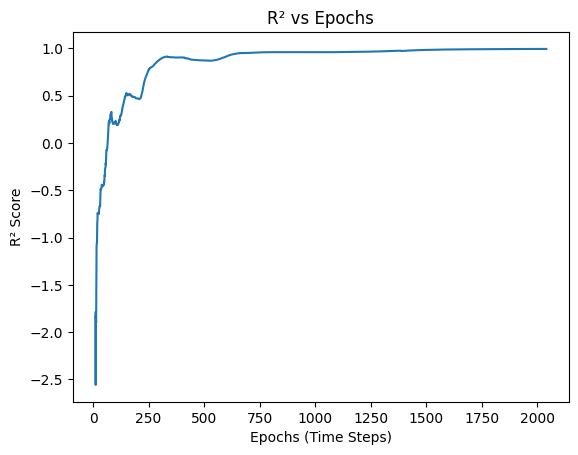

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

WINDOW = 10
series = df['voltage'].values

r2_scores = []
epochs = []

y_true = []
y_pred = []


for i in range(WINDOW, len(series)):
    pred = series[i-WINDOW:i].mean()

    y_pred.append(pred)
    y_true.append(series[i])


    if len(y_true) > 1:
        r2 = r2_score(y_true, y_pred)
        r2_scores.append(r2)
        epochs.append(i)

plt.figure()
plt.plot(epochs, r2_scores)
plt.xlabel("Epochs (Time Steps)")
plt.ylabel("R² Score")
plt.title("R² vs Epochs")
plt.show()


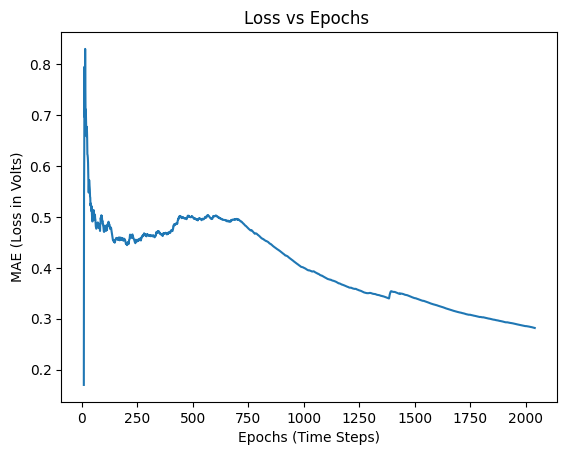

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

WINDOW = 10
series = df['voltage'].values

losses = []
epochs = []

y_true = []
y_pred = []

for i in range(WINDOW, len(series)):
    pred = series[i-WINDOW:i].mean()

    y_pred.append(pred)
    y_true.append(series[i])
    errors = np.abs(np.array(y_true) - np.array(y_pred))
    mae = errors.mean()

    losses.append(mae)
    epochs.append(i)

plt.figure()
plt.plot(epochs, losses)
plt.xlabel("Epochs (Time Steps)")
plt.ylabel("MAE (Loss in Volts)")
plt.title("Loss vs Epochs ") # MAE ka use kar rhe hai
plt.show()


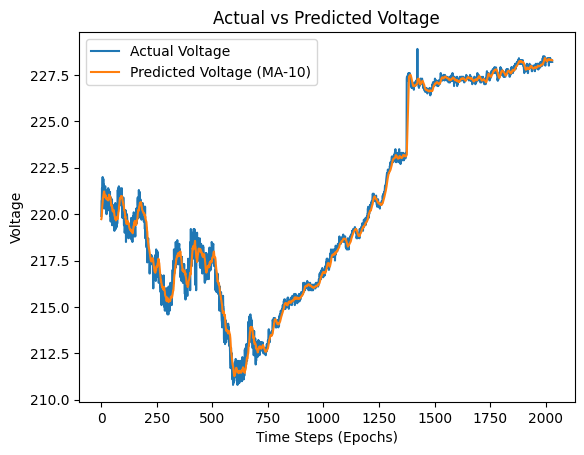

In [ ]:
WINDOW = 10
series = df['voltage'].values

y_true = []
y_pred = []

for i in range(WINDOW, len(series)):
    pred = series[i-WINDOW:i].mean()
    y_pred.append(pred)
    y_true.append(series[i])

y_true = np.array(y_true)
y_pred = np.array(y_pred)


plt.figure()
plt.plot(y_true, label="Actual Voltage")
plt.plot(y_pred, label="Predicted Voltage (MA-10)")
plt.xlabel("Time Steps (Epochs)")
plt.ylabel("Voltage")
plt.title("Actual vs Predicted Voltage")
plt.legend()
plt.show()

In [ ]:
import pickle

WINDOW = 10


model_state = {
    "window": WINDOW,
    "last_values": df['voltage'].iloc[-WINDOW:].values
}

with open("final_model.pkl", "wb") as f:
    pickle.dump(model_state, f)


In [ ]:
m = pd.read_csv("pzem_final.csv")


In [ ]:
m.shape

(2046, 17)